In [196]:
# import statistical tools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy.contrasts import Treatment

In [197]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [199]:
# load data; visualisation same as Section 3.6.3
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Carseats.csv"
Carseats = pd.read_csv(url, index_col = 'SlNo')

      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
SlNo                                                                            
1      9.50        138      73           11         276    120       Bad   42   
2     11.22        111      48           16         260     83      Good   65   
3     10.06        113      35           10         269     80    Medium   59   
4      7.40        117     100            4         466     97    Medium   55   
5      4.15        141      64            3         340    128       Bad   38   

      Education Urban   US  
SlNo                        
1            17   Yes  Yes  
2            10   Yes  Yes  
3            12   Yes  Yes  
4            14   Yes  Yes  
5            13   Yes   No  


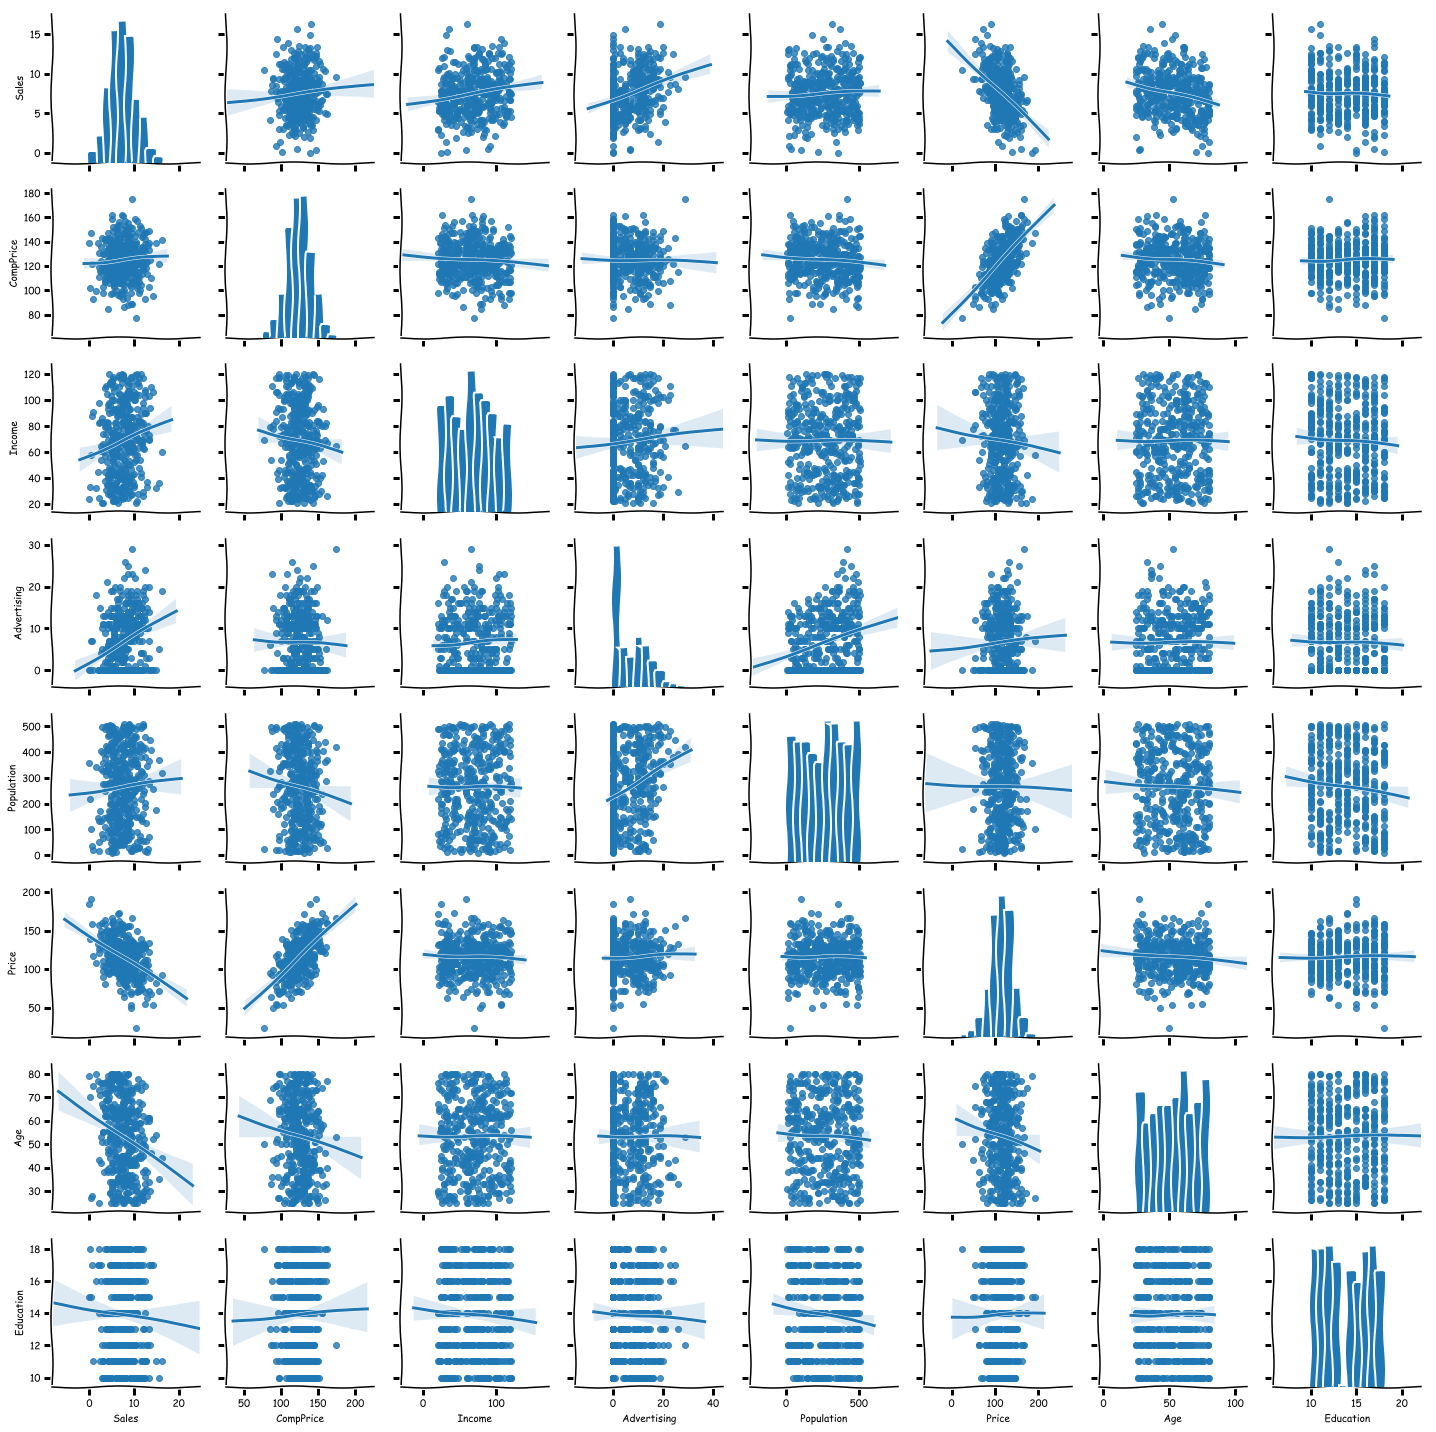

In [200]:
# view and visualise data
print(Carseats.head())
print(sns.pairplot(Carseats, kind = "reg"))

In [201]:
# perform regression
Y = Carseats['Sales']
X1 = Carseats['CompPrice']
X2 = Carseats['Income']
X3 = Carseats['Advertising']
X4 = Carseats['Population']
X5 = Carseats['Price']
X6 = Carseats['ShelveLoc']
X7 = Carseats['Age']
X8 = Carseats['Education']
X9 = Carseats['Urban']
X10 = Carseats['US']

model = ols("Y~X1+X2+X3+X4+X5+X6+X7+X8+X9+X10+X2:X3+X5:X7", data = Carseats).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 06 Jan 2019   Prob (F-statistic):          6.14e-166
Time:                        18:46:26   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5756      1.009      6.519   

In [202]:
# understanding dummy variables
levels = [1, 2, 3]
contrast = Treatment(reference=0).code_without_intercept(levels)
print(contrast.matrix)

[[0. 0.]
 [1. 0.]
 [0. 1.]]
